(more-lab)=
# Więcej warstw

In [3]:
import numpy as np                         # numeric
import matplotlib.pyplot as plt            # plotting
import matplotlib as mpl                   # plotting
from IPython.display import display, Image # display imported graphics

In [4]:
import os.path 

isdir = os.path.isdir('lib_nn') # check whether 'lib_nn' exists

if not isdir:
   !git clone https://github.com/bronwojtek/lib_nn.git # cloning the library from github

import sys                     
sys.path.append('./lib_nn') 

from neural import *            # importing my library package

Invoking __init__.py for neural


## Dwie warstwy neuronów

W poprzednim rozdziale pokazaliśmy, że neuron MCP ze schodkową funkcją aktywacji odpowiada nierówności $x \cdot w=w_0+x_1 w_1 + \dots x_n w_n > 0$, gdzie $n$ jest wymiarem przestrzeni wejściowej. Pouczające jest dalsze prześledzenie tej geometrycznej interpretacji. Przyjmując dla prostoty $n=2$ (płaszczyzna), powyższa nierówność odpowiada jej podziałowi na dwie półpłaszczyzny. Jak wiemy, prosta wyrażona jest równaniem

$$w_0+x_1 w_1 + x_2 w_2 = 0$$

i stanowi **linię podziału** na dwie półpłaszczyzny.

Wyobraźmy sobie teraz, że mamy więcej takich warunków: dwa, trzy itd., ogólnie $k$ niezależnych warunków. Biorąc koniunkcję tych warunków, możemy zbudować wypukłe obszary, jak przykładowo pokazano na {numref}`regions-fig`.

:::{figure-md} regions-fig
<img src="images/regions.png" width="620px"> 

Przykładowe obszary wypukłe na płaszczyźnie, od lewej do prawej: z jednym warunkiem nierówności, z koniunkcjami 2 warunków i z koniukcjami 3 lub 4 warunków nierówności, dającymi **wielokąty**.
:::

```{admonition} Obszar wypukły

Z definicji obszar $A$ jest wypukły wtedy i tylko wtedy, gdy odcinek pomiędzy dowolnymi dwoma punktami w $A$ jest zawarty w $A$. Obszar, który nie jest wypukły nazywa się **wklęsłym**.
```

Oczywiście, $k$ warunków nierówności można narzucić za pomocą $k$ neuronów MCP.
Przypomnijmy sobie z rozdz. {ref}`bool-sec`, że możemy w prosty sposób budować funkcje logiczne za pomocą sieci neuronowych. W szczególności możemy dokonać koniunkcji $k$ warunków, biorąc neuron o wagach $w_0=-1$ i $1/k < w_i < 1/(k-1)$, gdzie $i=1,\dots ,k$. Jedną z możliwości jest np.

$$w_i=\frac{1}{k-\frac{1}{2}}.$$

Rzeczywiście, niech $p_0=1$, a warunki narzucone przez nierówności oznaczymy jako $p_i$, $i=1,\dots,k$, które mogą przyjmować wartości 1 lub 0 (prawda lub fałsz). Następnie

$$p \cdot w =-1 + p_1 w_1 + \dots + p_k w_k = -1+\frac{p_1+\dots p_k}{k-\frac{1}{2}} > 0$$

wtedy i tylko wtedy, gdy wszystkie $p_i=1$, tj. wszystkie warunki są spełnione.

Architektury sieci dla warunków $k=1$, 2, 3 lub 4 są ukazane na {numref}`nfn-fig`. Idąc od lewej do prawej począwszy od drugiego panelu, mamy sieci z dwiema warstwami neuronów i z $k$ neuronami w warstwie pośredniej, zapewniającymi warunki nierówności, oraz jednym neuronem w warstwie wyjściowej, pełniącym funkcję bramki AND. Oczywiście dla jednego warunku wystarczy mieć jeden neuron, jak pokazano na lewym panelu {numref}`nfn-fig`.

:::{figure-md} nfn-fig

<img src="images/nf1-4.png" width="820px">

Sieci zdolne do klasyfikowania danych w obszarach z {numref}`regions-fig`.
:::

W interpretacji geometrycznej pierwsza warstwa neuronowa reprezentuje $k$ półpłaszczyzn, a neuron w drugiej warstwie odpowiada obszarowi wypukłemu o $k$ bokach.

Sytuacja w oczywisty sposób uogólnia się na dane w większej liczbie wymiarów. W takim przypadku mamy więcej czarnych kropek dla danych wejściowych na {numref}`nfn-fig`. Geometrycznie dla $n=3$ mamy do czynienia z dzieleniem na półprzestrzenie z pomocą płaszczyzn i tworzenie wypukłych [wielościanów](https://en.wikipedia.org/wiki/Wielościany), a dla $n>3$ z dzieleniem hiperprzestzreni [hiperpłaszczyznami](https:/ /en.wikipedia.org/wiki/Hyperplane) i tworzeniem wypukłych [politopów](https://en.wikipedia.org/wiki/Polytope).

```{note}
Jeśli w warstwie pośredniej znajduje się wiele neuronów, powstały wielokąt ma wiele boków, które mogą przybliżać gładką granicę, taką jak łuk. Aproksymacja jest coraz lepsza w miarę wzrostu $k$.
```

```{important}
Percepton z dwiema warstwami neuronów (z wystarczającą liczbą neuronów w warstwie pośredniej) może klasyfikować punkty należące do obszaru wypukłego w przestrzeni $n$-wymiarowej.
```

## Trzy lub więcej warstw neuronów

Pokazaliśmy właśnie, że sieć dwuwarstwowa może klasyfikować wielokąt wypukły. Wyobraźmy sobie teraz, że tworzymy dwie takie figury w drugiej warstwie neuronów, na przykład dzieki następującej sieci:

In [10]:
def plot_net_tri(n_layer):
    """
    Draw the network architecture
    
    input: array of numbers of neurons in subsequent layers [n0, n1, n2,...]
    return: graphics object
    """
    l_layer=len(n_layer)
    ff=plt.figure(figsize=(4.3,2.3),dpi=120)

    for j in range(n_layer[0]):
            plt.scatter(0, j-n_layer[0]/2, s=50,c='black',zorder=10)
    
    for i in range(1,l_layer):
        for j in range(n_layer[i]):
            plt.scatter(i, j-n_layer[i]/2, s=120,c='blue',zorder=10)
 
    for i in range(l_layer-1):
        for j in range(n_layer[i]):
            for k in range(n_layer[i+1]):
                if not (i==1 and ((j>2 and k==0) or (j<3 and k==1))):
                    plt.plot([i,i+1],[j-n_layer[i]/2,k-n_layer[i+1]/2],c='gray')

    for k in range(n_layer[l_layer-1]):
        plt.plot([l_layer-1,l_layer],[n_layer[l_layer-1]/2-1,n_layer[l_layer-1]/2-1],
                 c='gray')

    plt.axis("off")

    return ff


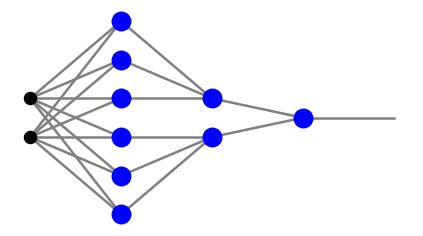

In [11]:
plt.show(plot_net_tri([2,6,2,1]))

Zauważmy, że pierwsza i druga warstwa neuronów nie są tutaj w pełni połączone, ponieważ „układamy na sobie” dwie sieci tworzące trójkąty, jak w trzecim panelu {numref}`nfn-fig`. Następnie w trzeciej warstwie neuronowej (tutaj posiadającej pojedynczy neuron) implementujemy bramkę $p \,\wedge \!\sim\!q$, czyli koniunkcję warunków, że punkty należą do jednego trójkąta, a nie należą do drugiego. Jak zaraz pokażemy, przy odpowiednich wagach powyższa siatka może wytworzyć obszar wklęsły, na przykład trójkąt z trójkątnym wgłębieniem:

:::{figure-md} tri-fig

<img src="images/tritri.png" width="200px">

Trójkąt z trójkątnym wgłębieniem.
:::


Uogólniając ten argument na inne kształty, można pokazać ważne twierdzenie:

```{important}
Perceptron z trzema lub więcej warstwami neuronów (z wystarczającą liczbą neuronów w warstwach pośrednich) może klasyfikować punkty należące do **dowolnego** regionu w $n$-wymiarowej przestrzeni z $n-1$-wymiarowymi ograniczeniami przez hiperpłaszczyzny.
```

```{note}
Warto tutaj podkreślić, że trzy warstwy zapewniają pełną funkcjonalność! Dodawanie kolejnych warstw do klasyfikatora nie zwiększa jego możliwości.
```

## Feed forward w Pythonie

Zanim przejdziemy do przykładu, potrzebujemy kodu w Pythonie do propagacji sygnału w przód w ogólnej, w pełni połączonej sieci. Będziemy reprezentować architekturę sieci z $l$ warstwami neuronów jako tablicę postaci

$$[n_0,n_1,n_2,...,n_l],$$

gdzie $n_0$ jest liczbą węzłów wejściowych, a $n_i$ liczbą neuronów w warstwach $i=1,\dots,l$. Na przykład architektura sieci z czwartego panelu {numref}`nfn-fig` to

In [12]:
arch=[2,4,1] 
arch

[2, 4, 1]

W kodach tego kursu posługujemy się konwencją z {numref}`MCP2-fig`, a mianowicie próg jest traktowany jednolicie z pozostałym sygnałem. Jednak węzły progowe nie są uwzględniane w określaniu liczb $n_i$ zdefiniowanych powyżej. W szczególności bardziej szczegółowy widok czwartego panelu {numref}`nfn-fig` to

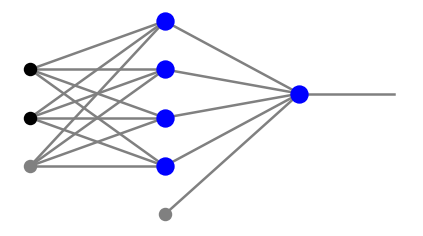

In [13]:
plt.show(draw.plot_net(arch))

Czarne kropki oznaczają dane wejściowe, szare kropki odpowiadają węzłom progowym, dającym input równy 1, a niebieskie kółka to neurony.

Następnie potrzebujemy wagi połączeń. Mamy $l$ zestawów wag, z których każdy odpowiada krawędziom wchodzącym do danej warstwy neuronowej od lewej strony.
W powyższym przykładzie pierwsza warstwa neuronów (niebieskie kółka po lewej stronie) ma wagi, które tworzą macierz $3 \times 4$. Tutaj 3 to liczba węzłów w poprzedniej (wejściowej) warstwie (łącznie z węzłem progowym), a 4 to liczba neuronów w pierwszej warstwie neuronowej. Podobnie wagi związane z drugą (wyjściową) warstwą neuronową tworzą macierz $4 \times 1$. Stąd w naszej konwencji macierze wag odpowiadające kolejnym warstwom neuronów $1, 2, \dots, l$ mają wymiary

$$
(n_0+1)\times n_1, \; (n_1+1)\times n_2, \; \dots \; (n_{l-1}+1)\times n_l.
$$

Tak więc, aby przechowywać wszystkie wagi sieci, tak naprawdę potrzebujemy **trzech** wskaźników: jeden dla warstwy, jeden dla liczby węzłów w poprzedniej warstwie i jeden dla liczby węzłów w danej warstwie. Moglibyśmy tutaj użyć trójwymiarowej tablicy, ale ponieważ numerujemy warstwy neuronów zaczynając od 1, a tablice zaczynają się od 0, nieco wygodniej jest użyć struktury **słownika** Pythona. Przechowujemy zatem wagi jako

$$w=\{1: arr^1, 2: arr^2, ..., l: arr^l\},$$

gdzie $arr^i$ jest **dwuwymiarową** tablicą (macierzą) wag dla warstwy neuronowej $i$. Dla przypadku z powyższego rysunku możemy wziąć na przykład

In [14]:
w={1:np.array([[1,2,1,1],[2,-3,0.2,2],[-3,-3,5,7]]),2:np.array([[1],[0.2],[2],[2],[-0.5]])}

print(w[1])
print("")
print(w[2])

[[ 1.   2.   1.   1. ]
 [ 2.  -3.   0.2  2. ]
 [-3.  -3.   5.   7. ]]

[[ 1. ]
 [ 0.2]
 [ 2. ]
 [ 2. ]
 [-0.5]]


Dla sygnału rozchodzącego się w sieci stosujemy również odpowiednio słownik w postaci

$$x=\{0: x^0, 1: x^1, 2: x^2, ..., l: x^l\},$$

gdzie $x^0$ to wejście, a $x^i$ to sygnał wychodzący z warstwy neuronowej $i$, dla $i=1, \dots, l$. Wszystkie symbole $x^j$, $j=0, \dots, l$ są tablicami jednowymiarowymi. Uwzględniamy tu węzły progowe, stąd wymiary $x^j$ wynoszą $n_j+1$, z wyjątkiem warstwy wyjściowej, która nie ma węzła odchylenia, stąd $x^l$ ma wymiar $n_l$. Innymi słowy, wymiary tablic sygnału są równe całkowitej liczbie węzłów w każdej warstwie.

Następnie przedstawiamy szczegółowo odpowiednie wzory, ponieważ jest to kluczowe dla uniknięcia ewentualnych pomyłek związanych z zapisem.
Wiemy już z {eq}`eq-f0`, że dla pojedynczego neuronu z $n$ wejściami, sygnał wchodzący jest obliczany jako

$$s = x_0 w_0 + x_1 w_1 + x_2 w_2 + ... + x_n w_n = \sum_{\beta=0}^n x_\beta w_\beta .$$

Przy większej liczbie warstw (oznaczonych wskażnikiem górnym $i$) i liczbie neuronów $n_i$ w warstwie $i$, notacja uogólnia się na

$$
s^i_\alpha=\sum_{\beta=0}^{n_{i-1}} x^{i-1}_\beta w^i_{\beta \alpha}, \;\; \alpha=1\dots n_i, \;\; i=1,\dots,l.
$$

Zauważmy, że sumowanie zaczyna się od $\beta=0$, aby uwzględnić węzeł progowy w poprzedniej warstwie $(i-1)$, ale $\alpha$ zaczyna się od 1, ponieważ tylko neurony (a nie węzeł progowy) w warstwie $i$ odbierają sygnał (patrz rysunek poniżej).

W notacji macierzowej możemy też zapisać bardziej zwięźle
$s^{iT} = x^{(i-1)T} W^i$, gdzie $T$ oznacza transpozycję, tzn.

$$
\begin{pmatrix} s^i_1 & s^i_2 & ...& s^i_{n_i} \end{pmatrix} = 
\begin{pmatrix} x^{i-1}_0 & x^{i-1}_1 & ...& x^{i-1}_{n_{i-1}} \end{pmatrix}
\begin{pmatrix} w^i_{01} & w^i_{02} & ...& w^i_{0,n_i} \\ w^i_{11} & w^i_{12} & ...& w^i_{1,n_i} \\ 
 ... & ... & ...& ... \\ w^i_{n_{i-1}1} & w^i_{n_{i-1}2} & ...& w^i_{n_{i-1}n_i} \end{pmatrix}.
$$

Jak już dobrze wiemy, wyjście z neuronu uzyskuje się działając na jego sygnał wejściowy funkcją aktywacji. W ten sposób w końcu mamy

$$ 
x^i_\alpha  = f(s^i_\alpha) = f \left (\sum_{\beta=0}^{n_{i-1}} x^{i-1}_\beta w^i_{\beta \alpha} \right), \;\; \alpha=1\dots n_i, \;\; i=1,\dots,l , \\
x^i_0 =1, \;\; i=1,\dots,l-1,  
$$

z węzłami progowymi równymi jeden. Poniższy rysunek ilustruje naszą notację.

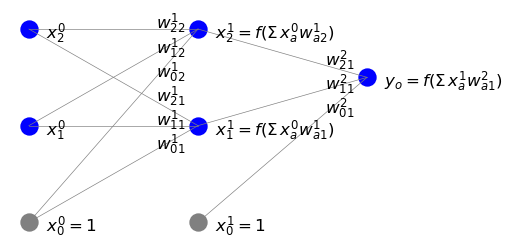

In [15]:
def plot_net_lab(n_war, weights, x):
    """draw network with labels"""
    li_war=len(n_war)
    plt.figure(figsize=(4,2.3),dpi=120) 

    for i in range(li_war): 
        for j in range(1,n_war[i]): 
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            lab=x[i][j]
            plt.text(i+0.1, j-n_war[i]/2-.1, lab, fontsize=10)
    
    for i in range(li_war-1): 
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray')
            lab=x[i][0]
            plt.text(i+0.1, 0-n_war[i]/2-.1, lab, fontsize=10)
   
    for i in range(li_war-1):
        for j in range(n_war[i]):
            for k in range(n_war[i+1]-1):
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c='gray',linewidth=0.4)
                plt.text(i+0.75, 0.25*(j-n_war[i]/2)+0.75*(k+1-n_war[i+1]/2), 
                         weights[i+1][j][k], fontsize=10)

    plt.axis("off")
    plt.show()
    

plt.show(plot_net_lab([3,3,2],
             {1: [["$w_{01}^{1}$", "$w_{02}^{1}$"], ["$w_{11}^{1}$", "$w_{12}^{1}$"], 
                  ["$w_{21}^{1}$", "$w_{22}^{1}$"]], 
              2: [["$w_{01}^{2}$"], ["$w_{11}^{2}$"], ["$w_{21}^{2}$"]]} ,
             {0: np.array(["$x_0^{0}=1$","$x_1^{0}$","$x_2^{0}$"]), 
              1: np.array(["$x_0^{1}=1$","$x_1^{1}=f(\Sigma \,x_a^{0} w_{a1}^{1})$",
                                           "$x_2^{1}=f(\Sigma \,x_a^{0} w_{a2}^{1})$"]), 
              2: np.array(["","$y_o=f(\Sigma \,x_a^{1} w_{a1}^{2})$"])}))

Implementacja propagacji feed-forward w Pythonie jest następująca:

In [16]:
def feed_forward(ar, we, x_in, f=func.step):
    """
    Feed-forward propagation
    
    input: 
    ar - array of numbers of nodes in subsequent layers [n_0, n_1,...,n_l]
    (from input layer 0 to output layer l, bias nodes not counted)
    
    we - dictionary of weights for neuron layers 1, 2,...,l in the format
    {1: array[n_0+1,n_1],...,l: array[n_(l-1)+1,n_l]}
    
    x_in - input vector of length n_0 (bias not included)
    
    f - activation function (default: step)
    
    return: 
    x - dictionary of signals leaving subsequent layers in the format
    {0: array[n_0+1],...,l-1: array[n_(l-1)+1], l: array[nl]}
    (the output layer carries no bias)
    
    """

    l=len(ar)-1                   # number of the neuron layers
    x_in=np.insert(x_in,0,1)      # input, with the bias node inserted
    
    x={}                          # empty dictionary x
    x.update({0: np.array(x_in)}) # add input signal to x
    
    for i in range(1,l):          # loop over layers except the last one
        s=np.dot(x[i-1],we[i])    # signal, matrix multiplication 
        y=[f(s[k]) for k in range(arch[i])] # output from activation
        x.update({i: np.insert(y,0,1)}) # add bias node and update x

                                  # the output layer l - no adding of the bias node
        s=np.dot(x[l-1],we[l])    # signal   
        y=[f(s[q]) for q in range(arch[l])] # output
        x.update({l: y})          # update x
          
    return x

Dla zwięzłości przyjmujemy konwencję, w której nie przekazujemy w argumentach funkcji węzła progowego. Jest on wstawiany do funkcji za pomocą **np.insert(x_in,0,1)**. Jak zwykle używamy **np.dot** do mnożenia macierzy.

Następnie testujemy, jak **feed_forward** działa dla przykładowych danych wejściowych. 

In [17]:
xi=[2,-1]
x=func.feed_forward(arch,w,xi,func.step)
print(x)

{0: array([ 1,  2, -1]), 1: array([1, 1, 0, 0, 0]), 2: [1]}


Końcowy output z tej sieci jest uzyskany jako 

In [11]:
x[2][0]

1

### Dygresja o sieciach liniowych

Zróbmy teraz następującą obserwację. Załóżmy, że mamy sieć z liniową funkcją aktywacji $f(s)=c s$. Wtedy ostatnia formuła z powyższego wyprowadzenia przyjmuje postać


$$
x^i_\alpha = c \sum_{\beta=0}^{n_{i-1}} x^{i-1}_\beta w^i_{\beta \alpha}, \;\; \alpha=1\dots n_i, \;\; i=1,\dots,l ,
$$

lub w notacji macierzowej:

$$
x^i = c x^{i-1}w^i.
$$

Powtarzając to, otrzymujemy sygnał w warstwie wyjściowej

$$
x^l = cx^{l-1} w^i = c^2 x^{l-2} w^{l-1} w^l =\dots= c^lx^0 w^1 w^2 \dots w^l =
x^0 W,
$$

gdzie $W=c^l w^1 w^2 \dots w^l$. Widzimy wiec, że taka sieć jest **równoważna** sieci jednowarstwowej z macierzą wag $W$ określoną powyżej.

``` {note}

Z tego powodu nie ma sensu rozważanie sieci wielowarstwowych z liniową funkcją aktywacji.
```


## Wizualizacja

W celu wizualizacji prostych sieci w module **draw** pakietu **neural** udostępniamy kilka funkcji rysowania, które ukazują zarówno wagi, jak i sygnały w sieci. Funkcja **plot_net_w** rysuje wagi dodatnie na czerwono, a ujemne na niebiesko, przy czym szerokości odzwierciedlają ich wielkość. Ostatni parametr, tutaj 0.5, przeskalowuje szerokości tak, że grafika wygląda ładnie. Funkcja **plot_net_w_x** drukuje dodatkowo wartości sygnału wychodzącego z węzłów każdej warstwy.

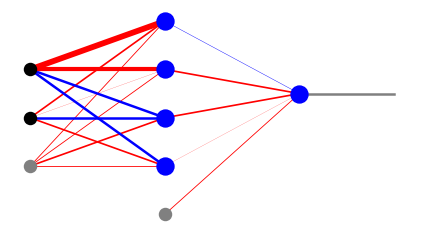

In [18]:
plt.show(draw.plot_net_w(arch,w,0.5))

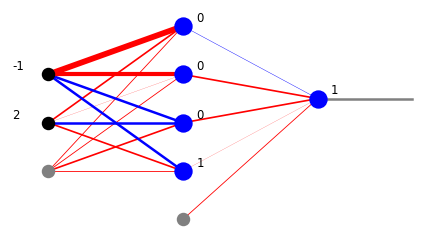

In [19]:
plt.show(draw.plot_net_w_x(arch,w,0.5,x))

## Klasyfikator z trzema warstwami neuronów

Jesteśmy teraz gotowi do jawnego skonstruowania przykładu binarnego klasyfikatora punktów w obszarze wklęsłym: trójkąta z trójkątnym wycięciem z {numref}`tri-fig`.
Architektura sieci to

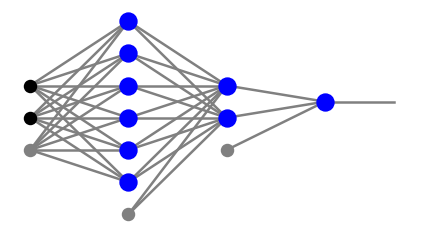

In [20]:
arch=[2,6,2,1]
plt.show(draw.plot_net(arch))

 Warunki geometryczne i odpowiadające im wagi dla pierwszej warstwy neuronowej to

| $\alpha$ | warunek | $w_{0\alpha}^1$ | $w_{1\alpha}^1$ | $w_{2\alpha}^1$ |
| --- | --- | --- | --- | --- |
| 1 | $x_1>0.1$ | -0.1 | 1 | 0 |
| 2 | $x_2>0.1$ | -0.1 | 0 | 1 |
| 3 | $x_1+x_2<1$ | 1 | -1 | -1 |
| 4 | $x_1>0.25$ | -0.25 | 1 | 0 |
| 5 | $x_2>0.25$ | -0.25 | 0 | 1 |
| 6 | $x_1+x_2<0.8$ | 0.8 | -1 | -1 |

Warunki 1-3 zapewniają granice dla większego trójkąta, a 4-6 dla mniejszego, zawartego w większym.
W drugiej warstwie neuronowej musimy zrealizować dwie bramki AND odpowiednio dla warunków 1-3 i 4-6, a zatem bierzemy


| $\alpha$ | $w_{0\alpha}^2$ | $w_{1\alpha}^2$ | $w_{2\alpha}^2$ | $w_{3\alpha}^2$ | $w_{4\alpha}^2$ | $w_{5\alpha}^2$ | $w_{6\alpha}^2$ |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1| -1 | 0.4 | 0.4 | 0.4 | 0 | 0 | 0 |
| 2| -1 | 0 | 0 | 0 | 0.4 | 0.4 | 0.4 |


Na koniec w warstwie wyjściowej realizujemy bramkę $p \wedge \! \sim\! q$, skąd

| $\alpha$  | $w_{0\alpha}^3$ | $w_{1\alpha}^3$ | $w_{2\alpha}^3$ |
| --- | --- | --- | ---  |
| 1   | -1  | 1.2 | -0.6 |


Łącząc to wszystko razem, uzyskujemy nastepujacy słownik wag:

In [22]:
w={1:np.array([[-0.1,-0.1,1,-0.25,-0.25,0.8],[1,0,-1,1,0,-1],[0,1,-1,0,1,-1]]),
   2:np.array([[-1,-1],[0.4,0],[0.4,0],[0.4,0],[0,0.4],[0,0.4],[0,0.4]]),
   3:np.array([[-1],[1.2],[-0.6]])}

Feed-forward dla prykładowego inputu daje

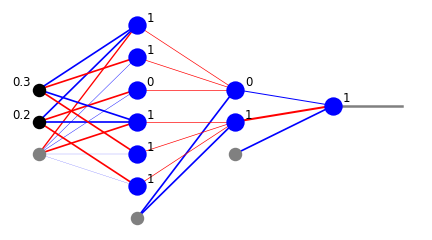

In [23]:
xi=[0.2,0.3]
x=func.feed_forward(arch,w,xi)
plt.show(draw.plot_net_w_x(arch,w,1,x))


Właśnie odkryliśmy, że punkt [0.2,0.3] znajduje się w naszym obszarze (1 z warstwy wyjściowej). Właściwie mamy tutaj więcej informacji z warstw pośrednich. Z drugiej warstwy neuronowej widzimy, że punkt należy do większego trójkąta (1 z dolnego neuronu), a nie należy do mniejszego trójkąta (0 z górnego neuronu). Z pierwszej warstwy neuronowej możemy odczytać warunki z sześciu nierówności.

Następnie testujemy działanie naszej sieci dla innych punktów. Najpierw definiujemy funkcję generującą losowy punkt w kwadracie $[0,1]\times [0,1]$ i propagujemy go przez sieć. Przypisujemy mu etykietę 1, jeśli należy do żądanego obszaru, a 0 w przeciwnym razie. Następnie tworzymy dużą próbkę takich punktów i generujemy grafikę, używając koloru różowego dla etykiety 1 i niebieskiego dla etykiety 0.

In [24]:
def po():
    xi=[np.random.random(),np.random.random()] # random point from the [0,1]x[0,1] square
    x=func.feed_forward(arch,w,xi)             # feed forward
    return [xi[0],xi[1],x[3][0]]               # the point's coordinates and label

In [25]:
samp=np.array([po() for _ in range(10000)])
print(samp[:5])

[[0.7088127  0.81098538 0.        ]
 [0.52044622 0.19265106 1.        ]
 [0.45637626 0.95670484 0.        ]
 [0.51723699 0.06066656 0.        ]
 [0.00879429 0.38239462 0.        ]]


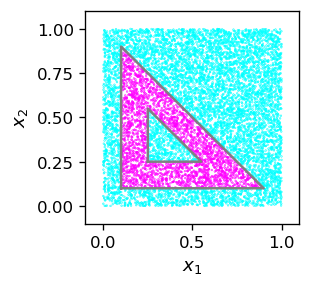

In [26]:
plt.figure(figsize=(2.3,2.3),dpi=120)                 
plt.xlim(-.1,1.1)                                
plt.ylim(-.1,1.1)
plt.scatter(samp[:,0],samp[:,1],c=samp[:,2],       
            s=0.1,cmap=mpl.cm.cool) 

plt.plot([.1,.9,.1,.1],[.1,.1,.9,.1],c='gray')
plt.plot([.25,.55,.25,.25],[.25,.25,.55,.25],c='gray')

plt.xlabel('$x_1$',fontsize=11)                    
plt.ylabel('$x_2$',fontsize=11)

plt.show()

Widzimy, że nasza maszynka działa doskonale!

W tym miejscu czytelnik może słusznie powiedzieć, że powyższe wyniki są trywialne: w istocie właśnie zaimplementowaliśmy pewne warunki geometryczne i ich koniunkcje.

Jednak, podobnie jak w przypadku sieci jednowarstwowych, istnieje ważny argument przeciwko tej pozornej błahości. Wyobraźmy sobie ponownie, że mamy próbkę danych z etykietami i tylko tele, podobnie jak w przykładzie pojedynczego neuronu MCP z rozdziału {ref}`MCP-lab`. Wtedy na początku nie mamy warunków granicznych i potrzebujemy jakiegoś skutecznego sposobu, aby je znaleźć. Właśnie to zadanie wykonuje za nas **uczenie** klasyfikatorów: ustala wagi w taki sposób, że odpowiednie warunki są domyślnie wbudowane. Po materiale z tego rozdziału czytelnik powinien być przekonany, że jest to jak najbardziej możliwe i nie ma w tym nic magicznego! W następnym rozdziale pokażemy, jak to praktycznie zrobić.

## Ćwiczenia

```{admonition} $~$
:class: warning

- Zaprojektuj sieć i uruchom kod z tego wykładu dla wybranego regionu wypukłego.
- Zaprojektuj i zaprogramuj klasyfikator dla czterech kategorii punktów należących do regionów utworzonych przez dwie przecinające się linie (wskazówka: uwzględnij wiecej komórek wyjściowych). 
```